<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/PCA_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the dataset
import pandas as pd
import numpy as np

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

wine.columns = ['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue','OD280/OD315_of_diluted_wines', 'Proline']

In [ ]:
wine.head(5)

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine.shape

(178, 14)

In [ ]:
x = wine.drop(['Class_label'],axis=1, inplace=False)
y= wine['Class_label']
x.shape

(178, 13)

In [ ]:
y.shape

(178,)

In [ ]:
np.round(x.describe(),2)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


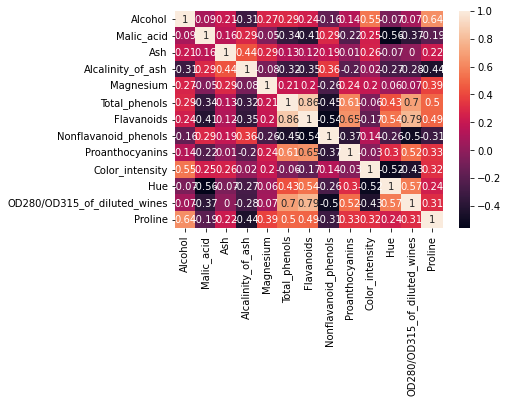

In [ ]:
sns.heatmap(np.round(x.corr(),2), annot=True)

There is a lot of correlation between features.

In [ ]:
from sklearn.preprocessing import scale
x_scaled = scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
x_scaled.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
# Here, mean is 0 and std. deviation is 1
np.round(x_scaled.describe(),2)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_scaled)

In [ ]:
pca

PCA()

In [ ]:
np.round(pca.explained_variance_ratio_,3)

array([0.362, 0.192, 0.111, 0.071, 0.066, 0.049, 0.042, 0.027, 0.022,
       0.019, 0.017, 0.013, 0.008])

It means first component has 36%, component has 19%, third component 11%, fourth componet 7% like that.

In [ ]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [ ]:
pca = PCA(5).fit(x_scaled)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'0.8016229275554786'

First 5 coponent gives 80% of data explaining power.

In [ ]:
#Eigen value part
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868])

This is eigen values of 5 components. It says first component has 4.73 explaining power like that.

In [ ]:
pca_df= pd.DataFrame(pca.components_, columns = x.columns)

In [ ]:
pca_df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

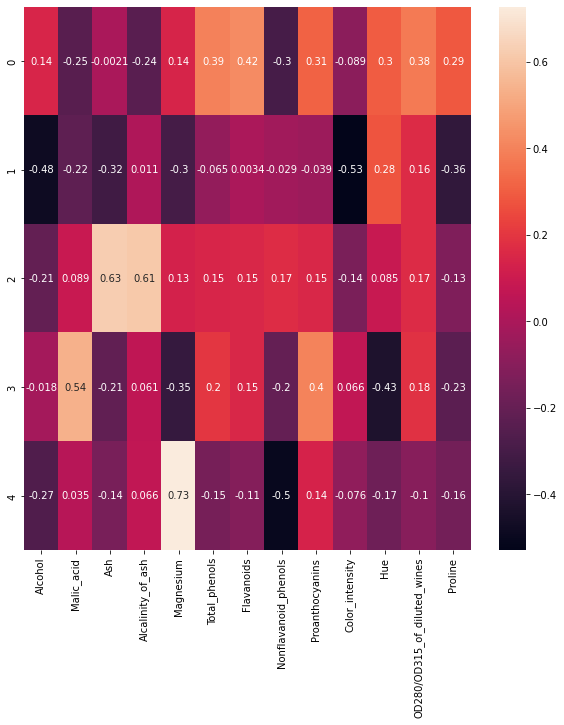

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pca_df, annot=True)
plt.show()

In [ ]:
x_scaled.shape

(178, 13)

In [ ]:
x_scaled_transform=pca.fit_transform(x_scaled)
x_scaled_transform.shape

(178, 5)

In [ ]:
x_scaled_trnsf= pd.DataFrame(x_scaled_transform, columns = ('p1','p2','p3','p4','p5'))
x_scaled_trnsf.head()

,p1,p2,p3,p4,p5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458


In [ ]:
x_scaled_trnsf.shape

(178, 5)

In [ ]:
x_scaled_trnsf.corr()

,p1,p2,p3,p4,p5
p1,1.000000e+00,-2.707492e-16,3.270863e-16,-1.949544e-16,5.104843e-17
p2,-2.707492e-16,1.000000e+00,2.415829e-16,5.846824e-17,9.571911e-17
p3,3.270863e-16,2.415829e-16,1.000000e+00,-1.845007e-16,2.414522e-16
p4,-1.949544e-16,5.846824e-17,-1.845007e-16,1.000000e+00,1.443976e-16
p5,5.104843e-17,9.571911e-17,2.414522e-16,1.443976e-16,1.000000e+00


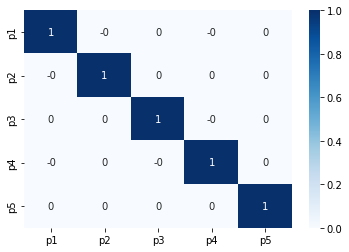

In [ ]:
sns.heatmap(np.round(x_scaled_trnsf.corr(),2), annot=True, cmap='Blues')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import SK Learn model for doing ML Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight='balanced', random_state=23)

In [ ]:
my_estimator = [10,100,1000]
my_max_depth = [5,10,15]
my_criterion = ['gini','entropy']
my_mean_sample_leaf = [2,5,10.15]
my_mean_sample_split =[2,5,10]
scorer = sklearn.metrics.make_scorer(sklearn.metrics.recall_score, average = 'weighted')

In [ ]:
import time

#start time
start = time.time()

#Building the model
grid_rf = GridSearchCV(estimator=forest, cv=4, scoring=scorer, 
                    param_grid= dict(max_depth = my_max_depth, criterion= my_criterion ,
                                     min_samples_leaf = my_mean_sample_leaf, min_samples_split = my_mean_sample_split, n_estimators = my_estimator))

grid_rf.fit(x_scaled_trnsf, y)

end= time.time()

training_time= end-start

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

In [ ]:
print("Time taken to train Random Forest: ", training_time)

Time taken to train Random Forest:  308.44279384613037


In [ ]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
grid_rf.best_score_

0.9662878787878788

In [ ]:
grid_rf.best_estimator_.feature_importances_
x_scaled_trnsf.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure=(10,10)
ft_importances = pd.Series(grid_rf.best_estimator_.feature_importances_, index = [x_scaled_trnsf.columns]).sort_values(axis=0, ascending=False)

In [ ]:
predicted = grid_rf.predict(x_scaled_trnsf)
from sklearn import metrics
print(metrics.classification_report(y, predicted))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        59
           2       0.99      0.97      0.98        71
           3       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



In [ ]:
df_confusion = metrics.confusion_matrix(y, predicted)
df_confusion

array([[58,  1,  0],
       [ 1, 69,  1],
       [ 0,  0, 48]])